In [1]:
# Configure slide scrolling
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'height': 768, 'scroll': True, 'width': 1024}

# The Nuts & Bolts of Machine Learning

TO DO
- Extract penalty functions for use in other notebooks
- 

## A Definition

>"A computer program is said to learn from **experience** *E* with respect to some class of **tasks** *T* and **performance measure** *P*, if its performance at tasks in *T*, as measured by *P*, improves with experience *E*." 
[Tom Mitchell, *Machine Learning* (1997)]

### Unpack the Definition
So computer programs are the things that do the learning. They are programmed to do certain tasks. Let's focus on a single task -- say, the ability to pick out a face in a photograph. As we increase the computer program's exposure to relevant experience, its performance can either stay the same, get worse, or improve. If performance improves, we say that the computer program *learns from experience*. If not, then there's no machine learning to speak of.

If we list the elements in this definition, we get:
- a computer program
- a task that the computer program performs
- experience used by the computer program to perform the task
- a measure of how well the computer program performs on the task

Let's start with *experience*.

## What is Experience?

Life provides us with a variety of experiences. We can see, feel, touch, smell, and taste (and perhaps have other abilities to sense and navigate our environment).

For a computer program that learns -- i.e., for machine learning -- there are three things to keep in mind about exeperience.

- Experience $\neq$ Rules
- Experience = Data
- Data = A Table of Numbers

It's as easy as that! Let's see what this looks like for various kinds of experience.

## Experiece in the Form of Images


![Valentino Rossi](../Images/Nuts-and-Bolts/Rossi.png)

To a computer program that learns from experience, an image is a grid of pixels. In this case, we've arbitrarily created a grid of 5x10 pixels. For color images, each pixel is represented by 3 numbers: the values of the Red, Green, and Blue components of the color (RGB color values). Each of these values is an integer between 0 and 255.

![Valentino Rossi Pixelated](../Images/Nuts-and-Bolts/Rossi-Grid.png)

So this image is read by the computer program as a row of 50 items, each item containing 3 integers.

![Valentino Rossi Pixel Row](../Images/Nuts-and-Bolts/Image-Pixel-Row.png)


## Experience in the Form of Images

This is what we see. But a computer sees...is just a table of numbers. So being able to detect a motorcylce in a picture (or a face in a picture) is not as easy as you'd think.

![What Computers See](../Images/Nuts-and-Bolts/motorcylce.png)

Of course, humans find doing this kind of thing (identifying pictures of motorcycles or helmets on motorcycle rides) trivially easy. Computer programs do get better as they're exposed to more images, so this fits the classic definition of machine learning and computer vision continues to be hot area of research in the field.

## Experience in the Form of Text

![Some Text](../Images/Nuts-and-Bolts/Text.png)

To a computer program that learns from experience, a text document is a row of numbers. Each word in the document is represented by a row of string of numbers. We'll see later what these numbers are.

![Text as Row of Numbers](../Images/Nuts-and-Bolts/Text-Data.png)

## Experience in the Form of Sounds

To a computer program, an audio stream is, not surprisingly, also a row of numbers. For example, these numbers can be [time, amplitude] pairs such as [1, 23.2].

![Audio Streams](../Images/Nuts-and-Bolts/Audio-Streams.png)
![Audio as Numbers](../Images/Nuts-and-Bolts/Audio-Data-Row.png)

## Experience in the Form of Spreadsheets

We've seen that data that comes to us in the form of images, text, and audio are converted into tables of numbers so that computer programs can make sense of them.

Data that comes to us in spreadsheets are already in the form of an m x n table where m is the number of rows and n is the number of columns of the table.

![Text as Row of Numbers](../Images/Nuts-and-Bolts/Data-Table.png)

To make this table suitable for use in a computer program, we represent categories like "Male" and "Female" with integrers (say, Male = 0, Female = 1). Similarly, Smoker can be 1 and Non-Smoker can be represented by 0.

## Experience is a Table of Numbers

Let's sum up what experience is to a computer program.

- In machine learning experience $\neq$ rules or recipes.
- Experience is a table of numbers.

The table of numbers has a structure as we see below:

![Text as Row of Numbers](../Images/Nuts-and-Bolts/Features.png)

- The inputs are called *features*. These are marked f1 through f6 in the diagram above.
- One of the columns is labeled the *output*.
- The inputs and the output are *always* numbers. These numbers can be:
    - postitive or negative integers such as 0, 1, -2, and so on
    - positive or negative reals such as 0.5, 26.4, -3.6, and so on
    
And that's what experience is for a computer program.

## What are Tasks?

In machine learning, tasks fall into 3 categories:
- Predict a number (e.g., something that's on a continuous scale, like temparature)
- Predict a category or class (e.g., smoker or non-smoker?)
- Don't predict anything; instead find patterns in the data set. These patterns fall into 3 groups:
    - Clustering (which rows of the dataset can be grouped together? For example, do purchasers of )
    - Association (are there rules that connect rows of a dataset to other rows of the dataset?)
    - Reduction/Compression (can the dataset be represented by one that has fewer features?)
    
In machine learning, prediction is possible only when the dataset has a clearly demarcated output column. In other words, we need to have a dataset that already says if the values of features f1, f2, f3 are such and such then the value of the output is such and such. If we don't have this kind of dataset, we *cannot* predict anything.

For this reason, prediction is called a *supervised* learning problem. The learning is supervised or controlled by the actual outputs in the dataset.

When the dataset does not have a designated column of outputs, then there's no sense in predicting an output. Rather, in these cases, machine learning algoritms are used to better understand the structure of the dataset -- whether and how the elements of the dataset are grouped together, how these elements are associated with each other. This is called *unsupervised* learning.

There are other types of learning that are variants or each of these main types.

## Task = Predict the Price of a House

Let's take a specific task. Suppose we have some data on house prices in Portland, Oregon. In particular, we have a dataset that lists a number of houses (let's say we have 300 of them). For each row of the dataset represents the features and the output of a single house. The two features are the number of bedrooms a house has and the size of the house in square feet. The output is the price of the house.

![House Price Dataset Excerpt](../Images/Nuts-and-Bolts/House-Features.png)

**Our task, to put it precisely, is to predict the price of house that is *not* in this dataset. In other words, given number of bedrooms and the size of the house in square feet, we'll (or the computer program will) have to predict the price of the house.**

Note: We think of prediction as having to do with events in the future (remember the Yogi Berra's line that prediction is hard, especially of the future?). But prediction in the context of machine learning has to do with coming up with an output that is not in the dataset given a set of input/feature values that are not in the dataset. If the feature values are in the dataset then we can just look up the output in the dataset and we wouldn't need to predict anything. 

(There is a subtle point here about machine learning that we'll come to see in a later session when we talk about measuring how good a machine learning model is.)

So prediction in the machine learning context is about the as yet unseen rather than the temporal notion of something that's going to happen in the future.

## Notation

We won't be using a lot of notation in this course, but this is a situation where just a bit of notation goes a long way.

Think of the dataset as being built up of the following values:

![Text as Row of Numbers](../Images/Nuts-and-Bolts/House-Price-Dataset.png)

![Text as Row of Numbers](../Images/Nuts-and-Bolts/Notation.png)

## Constructing a Model to Do the Prediction Task

To predict the price of a house that's not in the dataset we're going to pretend that the price can be constructed by adding and multiplying some numbers.

$$(w_{1} * x_{1}) + (w_{2} * x_{2}) = \hat{y}$$

- $x_{1}$ = number of bedrooms (the first feature)
- $x_{2}$ = size in square feet (the second feature)
- $w_{1}, w_{2}$ = parameters
- $\hat{y}$ = predicted house price

For mathematical reasons, this is written with an additional parameter $w_{0}$ like this:

$$(w_{0} * x_{0}) + (w_{1} * x_{1}) + (w_{2} * x_{2}) = \hat{y}$$

$w_{0}$ is called the *intercept value* and we'll determine this value as part of the machine learning process. 

$x_{0}$ on the other hand is a constant that is always equal to the value of 1.

## What the Model Has Done to the Dataset

Let's look at what we've done in constructing the model.

![Model Adds Columns](../Images/Nuts-and-Bolts/Dataset-Expand-Columns.png)

As it says in the diagram, the model's effect on the table is to expand it by adding some columns to the table. The dataset now looks like this in full.

![Model Full Dataset](../Images/Nuts-and-Bolts/House-Price-Dataset2.png)

For each row, we're going to say:

![Model Full Dataset with Predictions](../Images/Nuts-and-Bolts/House-Price-Dataset3.png)

Notice that while the $x_{1}$s, the $x_{2}$s, and the $\hat{y}$s are different in each row, the $w_{0}$, $w_{1}$, and $w_{2}$ values are *exactly the same in every row*.

We know all the $x_{0}$, $x_{1}$, and $x_{2}$ values for the entire dataset. If we knew the values of $w_{0}$, $w_{1}$, and $w_{2}$, we'd be able to find the $\hat{y}$ values.

So the question is: how do we find the values of $w_{0}$, $w_{1}$, and $w_{2}$?

## How Do We Find the Parameter Values?

To find the values of $w_{0}$, $w_{1}$, and $w_{2}$, let's look at the first row of the dataset.

![Model Dataset First Row](../Images/Nuts-and-Bolts/House-Price-Dataset-Row.png)

- (A) We'd like to calculate $\hat{y}^{(1)}$ -- the predicted price by calculating $\hat{y}^{1} = (w_{0} * x_{0}^{(1)}) + (w_{1} * x_{1}^{(1)}) + (w_{2} * x_{2}^{(1)})$.
- (B) We'd like $\hat{y}^{(1)}$ to be as close to $y^{(1)}$ as possible.

Given (A) and (B), what should the values of $w_{0}$, $w_{1}$, and $w_{2}$ be?

## First Try

As a first attempt, what if we just solved the following equation to find the values of $w_{0}$, $w_{1}$, and $w_{2}$?

$$(w_{0} * 1) + (w_{1} * 4) + (w_{2} * 2500) = 350000$$

In other words, make the prediction exactly equal to the price of the house. This is promising because we're focusing on minimizing the difference between the actual and the predicted price.

But it still leaves us with too many options for the values of $w_{0}$, $w_{1}$, and $w_{2}$. 

## Another Approach

What if we just randomly chose the values of $w_{0}$, $w_{1}$, and $w_{2}$? How about:

- $w_{0}$ = -10
- $w_{1}$ = 500
- $w_{2}$ = 160.5

This gives us a predicted price of $\hat{y}^{(1)}$ = 322,990.

Not bad. This is a little lower than the actual price of 350,000.

## The Penalty for Making Incorrect Predictions

How well did we do by choosing random values for $w_{0}$, $w_{1}$, and $w_{2}$? Is there a way to measure how good these values are?

One way to think about this is to ask: How much should we be penalized for this incorrect prediction of 322,990 for the price of first house in the dataset?

What if we used a simple idea that the size of the penalty (or the cost of being wrong) is just the difference between the predicted and the actual value?

> This brings us to one of the most important fundamental ideas in data mining [machine learning] -- one that surprisingly is often overlooked even by data scientists themselves: we need to ask, what should be our goal or *objective* in choosing the parameters? In our case, this would allow us to anser the question: waht wights whould we choose? Our general procedure will be to define an *objective function* that represents our goal, and can be calculated for a particualr set of weights and a particular set of data. We will then find the optimal value for the weights by maximizing or minimizing the objective function. What can easily be overlooked is that these weights are "best" only if we believe that the objective function truly represents what we want to achieve, or practically speaking, is the best proxy we can come up with. We will return to this later in this book.

> Unfortunately, creating an objective function that matches the true goal ofthe data mining [machine learning task] is usually impossible, so data scientists often choose based on faith and experience. Several choices have been shown to be remarkably effective. [Provost and Fawcett (2013), pp.88-9.]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the data for a plot with slope = 1
x, y = np.linspace(-500000,500000,500), np.linspace(-500000,500000,500)

# Set up the plot area
fig, ((ax11, ax12), 
      (ax21, ax22), 
      (ax31, ax32), 
      (ax41,ax42)) = \
plt.subplots(figsize=(15,15), nrows=4, ncols=2, sharey=False)

# Generate the plots
ax11.plot(x,y)
ax12.plot(x,-y)

def f21(x):
    if(x < 0): return -x
    else: return 0

ax21.plot(x, list(map(f21,x)))

def f22(x):
    if(x < 0): return 0
    else: return x
ax22.plot(x, list(map(f22,x)))

def f31(x):
    if (x < 0): return -x
    else: return x

ax31.plot(x, list(map(f31,x)))

def f32(x):
    if (x < 0): return x
    else: return -x

ax32.plot(x, list(map(f32,x)))

ax41.plot(x, y**2)

ax42.plot(x, -y**2)


fig.suptitle('A Variety of Penalty Functions', fontweight='bold')

# Plot (1,1)
ax11.set(xlabel='Predicted Value - Actual Value',
         ylabel='Penalty'
        )
ax11.axvline(x=0, color='black')
ax11.axhline(y=0, color='black')

# Plot (1,2)
ax12.set(xlabel='Predicted Value - Actual Value')
ax12.axvline(x=0, color='black')
ax12.axhline(y=0, color='black')

# Plot (2,1)
ax21.set(xlabel='Predicted Value - Actual Value', ylabel='Penalty')
ax21.axvline(x=0, color='black')
ax21.axhline(y=0, color='black')
ax21.set_ylim([-500000,500000])

# Plot (2,2)
ax22.set(xlabel='Predicted Value - Actual Value')
ax22.axvline(x=0, color='black')
ax22.axhline(y=0, color='black')
ax22.set_ylim([-500000,500000])

# Plot (3,1)
ax31.set(xlabel='Predicted Value - Actual Value')
ax31.set(ylabel='Penalty')
ax31.axvline(x=0, color='black')
ax31.axhline(y=0, color='black')
ax31.set_ylim([-500000,500000])

# Plot (3,2)
ax32.set(xlabel='Predicted Value - Actual Value')
ax32.axvline(x=0, color='black')
ax32.axhline(y=0, color='black')
ax32.set_ylim([-500000,500000])

# Plot (4,1)
ax41.set(xlabel='Predicted Value - Actual Value')
ax41.set(ylabel='Penalty')
ax41.axvline(x=0, color='black')
ax41.axhline(y=0, color='black')

# Plot (4,2)
ax42.set(xlabel='Predicted Value - Actual Value')
ax42.axvline(x=0, color='black')
ax42.axhline(y=0, color='black')

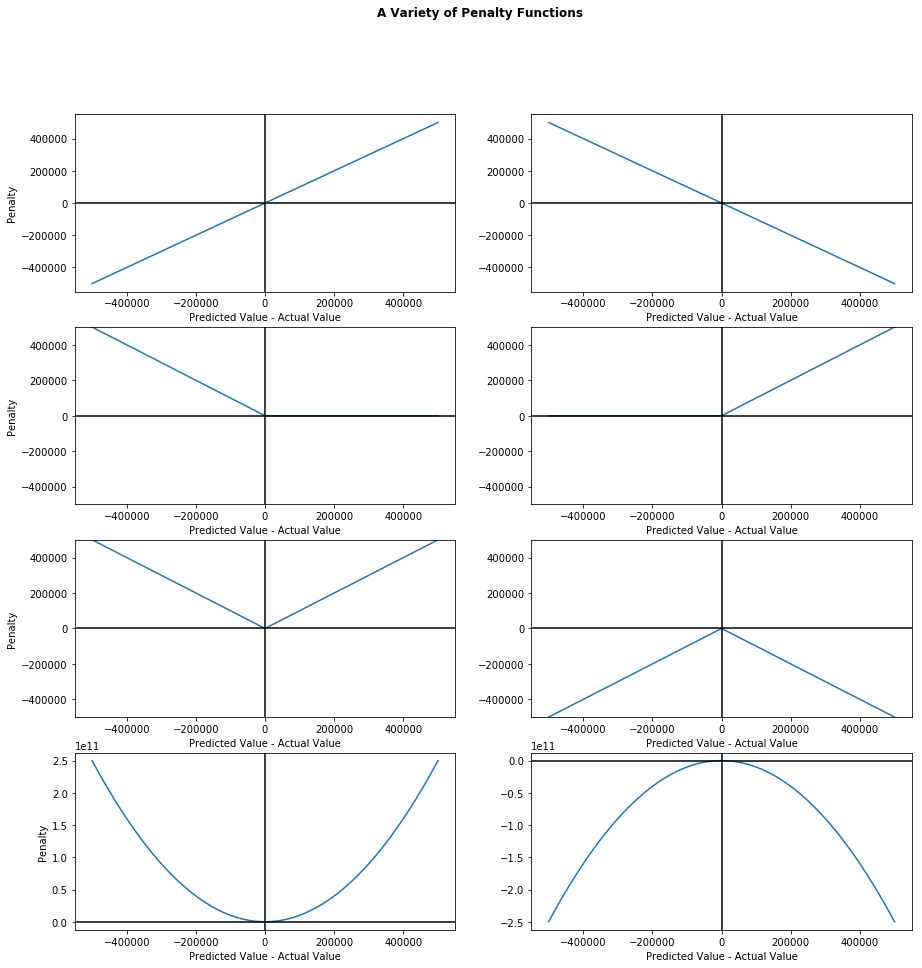

In [3]:
# A few different types of penalty functions
plt.show()

## Including a Penalty Column in the Dataset

Let's go back to our datatable and expand it to include one more column -- one for the penalty calculated.

![Model Dataset with Penalty Column](../Images/Nuts-and-Bolts/House-Dataset-with-Penalty-Column.png)

We can use any penalty function that makes sense to us. For a penalty function to make sense, it should behave according to the following principles:
- The better the prediction, i.e., the closer the prediction is from the actual value, the lower the penalty.
- The best prediction has the *smallest* penalty.

## Minimizing the Penalty over the Entire Dataset

Remember that the values of $w_{0}$, $w_{1}$, and $w_{2}$ are the same for every row in the data set. Lets say we pick the same values for these parameters as before:

- $w_{0}$ = -10
- $w_{1}$ = 500
- $w_{2}$ = 160.5

For these values, let's calculate the penalty for *every* row of the dataset and *sum* the values over the entire dataset.

![Model Dataset with Penalty Column2](../Images/Nuts-and-Bolts/House-Dataset-with-Penalty-Column2.png)

**What We Want**

**The values of $w_{0}$, $w_{1}$, and $w_{2}$ that minimizes the sum of the penalties over the entire dataset.**

That's all well and good, but *how exactly* are we to find these values for $w_{0}$, $w_{1}$, and $w_{2}$?

To solve this final piece of the puzzle, let's visualize the penalty as a function of the parameter values.

## Two Types of Performance

Tom Mitchell's definition of machine learning might be too narrow and too broad at the same time. The culprit could be the phrase, "if its performance at tasks in *T*, as measured by *P*, improves with experience *E*."

Suppose the task is recoginizing a face in a photograph. The relevant experience is photographs with faces that occur in them identified as such.

You could imagine a computer program learning to do this task *T* from experience *E*. Let's say its performance on the task after experiencing 100 photos is p. Give it more relevant experience, and say its performance doesn't improve beyond p. Should we rule this out as a case of machine learning? Probably not. So in this case the definition is too narrow -- it rules out too many cases that fit the bill.

The most basic task in any machine learning is to find the values of the parameters of the model that minimize the penalty on the dataset as a whole. For this task, it's obvious that as we expose more and more of the rows of the dataset to the optimization algorithm, the values of the parameters will get better and better and better -- i.e., closer and closer to the actual values that miniminze the penalty over the entire dataset. So in this case the definition is too broad -- it doesn't rule out anything.

More on this when we explore the art of machine learning -- determining how good a machine learning system is.

## Finding Your Way to the Valley Floor

Suppose I helicoptered you to the top of a mountain, blindfolded you and said, "Let's see if you can find your way to the bottom of this mountain, good luck!" How would you find you way down to the valley floor?

Here's one way to do it. Feel around with your foot in every direction around you. Take one tiny step in the direction that feels like it's descending the most rapidly. Repeat until it's flat in all directions around you. It's simplistic, might take you a (long) time to get to the bottom, but given your situation it's worth a shot.

This "algorithm" for taking baby steps in the right direction, is similar to the one that computer programs use to find their way to the minimum penalty over the entire dataset. It's known as *Gradient Descent*. You can alter the size of the step you take -- the size is called the *learning rate*. You can alter the total number of steps you're willing to take, i.e., the number of *iterations* of the gradient descent algorith.

In a real-world problem, the algorithm needs to use sophisticated techniques of numerical computation to return results efficiently. Thankfully, we can stand on the shoulders of the amazing work that people have done in numerical computation and make use of these hard-earned results to make our job a lot easier.

To visualize this in the 3 dimensions we have, let's pretend we only had $w_{0}$ and $w_{1}$ to find. Then for any pair of values for $w_{0}$ and $w_{1}$, we can calculate the total penalty across the entire dataset. Imagine we did this for a whole bunch of values of $w_{0}$ and $w_{1}$. Then we'd have something like what we see below -- a hilly penalty terrain.

![Penalty Surface](../Images/Nuts-and-Bolts/Penalty-Surface.png)

- A numerical computation algorithm is a recipe for finding the values of $w_{0}$ and $w_{1}$ that result in the minimum penalty over the entire dataset. The algorithm we just described for finding your way to valley floor is called *Gradient Descent* and is used frequently in machine learning.
- The values of $w_{0}$ and $w_{1}$ that result in the minimum penalty over the entire dataset are the values that are then used to predict the value of the output for a new set of inputs. (Recall the model that multiplies the w values by the respective feature values to generate this prediction.)
- The computer program has *learned* the parameter values from experience.

## The Gradient Descent Algorithm

The numerical computation algorithm that finds the values of the parameters that result in the lowest penalty over the entire dataset (gradient descent) is simple to write down:
    - Step 1: Pick any set of initial values for $w_{0}$, $w_{1}$, and $w_{2}$.
    - Step 2: Find the total penalty over the dataset.
    - Step 3: Look all around $w_{0}$, $w_{1}$, and $w_{2}$. Find values close to the previous values that result in a lower penalty. If none of the close values result in a lower penalty, STOP.
    - Step 4: Repeat Step 3.

## Summary

- Experience = the complete dataset
- Task = predict the price of a house given the number of bedrooms and the size of the house
- Performance = The value of the penalty function for a particular set of parameter values
- Best performance = The parameter values that minimize the penalty over the entire dataset
- The way to get to the best performance values for $w_{0}$, $w_{1}$, and $w_{2}$ is to use a numerical computation algorithm.
- Machine learning problems are giant numerical optimzation problems over the entire dataset.
- You don't need big data to do machine learning (but it can help for some problems).

## Looking Ahead: The Seven Steps of Machine Learning

1. Understand the data you have (where does it come from, how was it obtained, how representative is it?)
2. Define the task you want to accomplish.
    1. Identify the inputs. These will be the features of the dataset.
    2. Identify the output. This will be the thing that you'd like to predict. [When there is no output you can still do machine learning -- it's called *unsupervised* machine learning. We'll come to it later in the course.]
3. Define the model.
    1. Define the features (they could be the same as the inputs).
    2. Figure out how you're going to transform the features into the output.
    3. Clarify the parameters whose values need to be learned.
4. Define the penalty for incorrect answers.
5. Find the parameter values that minimize the penalty over the entire dataset.
6. Use the parameter values and the model to predict a new ouput value for a new set of inputs.
7. Measure the performance of the model and understand how it can be improved.